# **SUMMARY**

In [14]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pymupdf

In [15]:
doc =pymupdf.open("gilbert-et-al-2003-multiple-scattering-calculations-of-bonding-and-x-ray-absorption-spectroscopy-of-manganese-oxides.pdf")

In [16]:
for page_index in range(len(doc)): # iterate over pdf pages
    page = doc[page_index] # get the page
    image_list = page.get_images()
    # print the number of images found on the page
    if image_list:
        print(f"Found {len(image_list)} images on page {page_index}")
    else:
        print("No images found on page", page_index)
    for image_index, img in enumerate(image_list, start=1): # enumerate the image list
        xref = img[0] # get the XREF of the image
        pix = pymupdf.Pixmap(doc, xref) # create a Pixmap
        if pix.n - pix.alpha > 3: # CMYK: convert to RGB first
            pix = pymupdf.Pixmap(pymupdf.csRGB, pix)
        pix.save("page_%s-image_%s.png" % (page_index, image_index)) # save the image as png
        pix = None


No images found on page 0
No images found on page 1
Found 3 images on page 2
Found 2 images on page 3
No images found on page 4
Found 1 images on page 5
Found 2 images on page 6
No images found on page 7
No images found on page 8


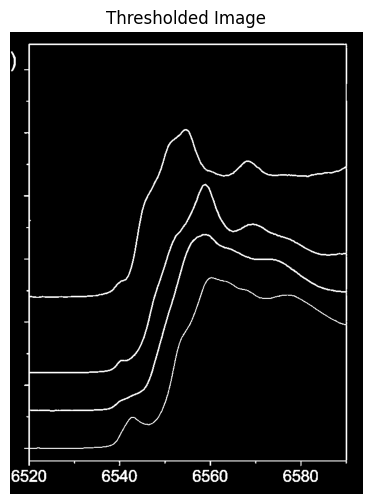

In [17]:
# Load image
img = cv2.imread("page_14-image_1(1).png", cv2.IMREAD_GRAYSCALE)
# Thresholding to binary image
_, thresh = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
# Step: Thresholded Image
plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

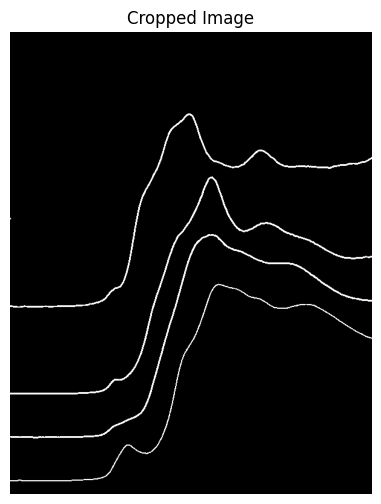

In [18]:
#step 1: crop the image to focus on the graph area
#Assuming the graph occupies most of the image, we mainly crop out the borders
#Adjust these value according to your image's borrders
cropped_img = thresh[50:-65, 38:-35] #Adjust crop dimensions as needed

#ste: Thresholded Image
plt.figure(figsize=(6,6))
plt.imshow(cropped_img, cmap='gray')
plt.title('Cropped Image')
plt.axis('off')
plt.show()

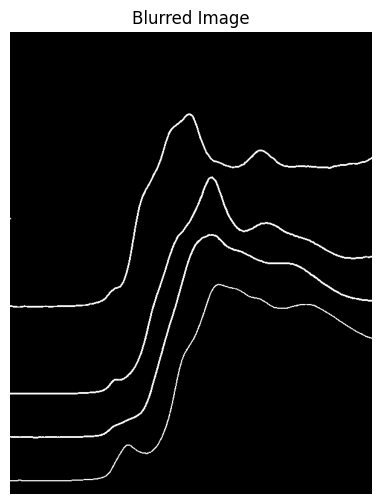

In [19]:
#Apply Gaussian Blur (optional may help smooth lines)
blurred_img=cv2.GaussianBlur(cropped_img, (1, 1), 0)

#Step: Blurred + Threshold image
plt.figure(figsize=(6, 6))
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()


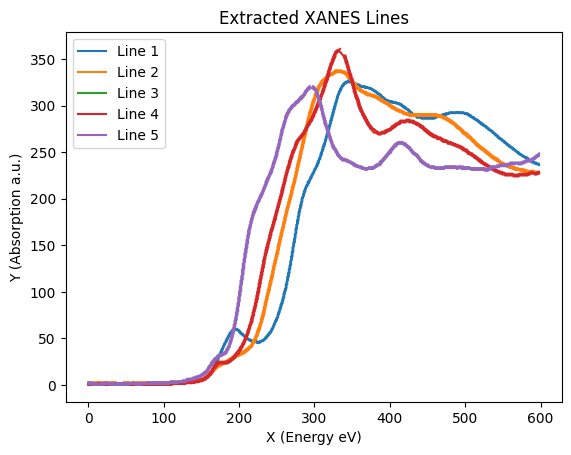

Contours found: 5


In [20]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'blurred_img' is the preprocessed image
# Find contours of the lines
contours, _ = cv2.findContours(blurred_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create lists to store the x and y coordinates of each line
lines_data = {}

# Loop through contours to extract data points for each line
for i, contour in enumerate(contours):
    # Get the contour's points and flatten to a 2D array
    contour_points = contour.squeeze()
    # Separate x and y coordinates
    x_coords = contour_points[:, 0]
    y_coords = contour_points[:, 1]
    
    # Normalize or flip y-coordinates to match your required format (increasing energy)
    y_coords = max(y_coords) - y_coords
    
    # Store the line's data points
    lines_data[f'line_{i+1}'] = {'x': x_coords, 'y': y_coords}
    
    # Optionally, plot each line
    plt.plot(x_coords, y_coords, label=f'Line {i+1}')

# Show the lines on a plot
plt.xlabel('X (Energy eV)')
plt.ylabel('Y (Absorption a.u.)')
plt.title('Extracted XANES Lines')
plt.legend()
plt.show()

# Convert the extracted data to pandas DataFrames
dataframes = {}
for line_name, data in lines_data.items():
    dataframes[line_name] = pd.DataFrame({'x': data['x'], 'y': data['y']})

print("Contours found: " + str(len(contours)))
# Blue-MnO2  -Line1
# Red -Mn3O4 -Line4
# Purple-MnO -Line5
# Orange-Mn2O3-Line2
# 

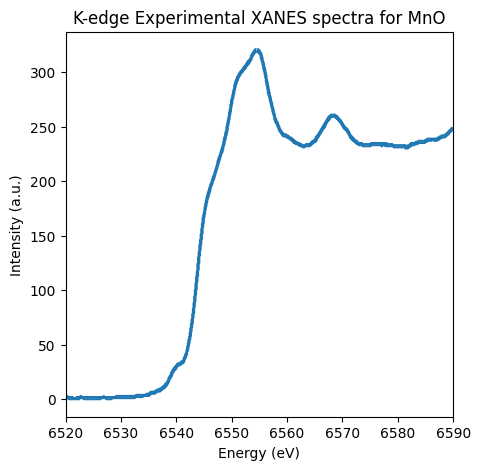

In [21]:
plt.figure(figsize=(5, 5))  # Set the figure size if needed
line5 = dataframes["line_5"]
# Plot the 'x' and 'y' columns
line5["x"]= line5["x"]*(70/600)+6520
# max_absorption = np.max(line5['y'])
# line5['y']= np.abs(line5['y']-max_absorption)
# plt.gca().invert_yaxis()  # Invert y-axis if needed
plt.plot(line5["x"], line5["y"])
plt.xlim(6520, 6590)  # Replace with the desired min and max for your x-axis

# Add labels and a title to the plot
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (a.u.)')
plt.title('K-edge Experimental XANES spectra for MnO')
# Show the plot
plt.show()


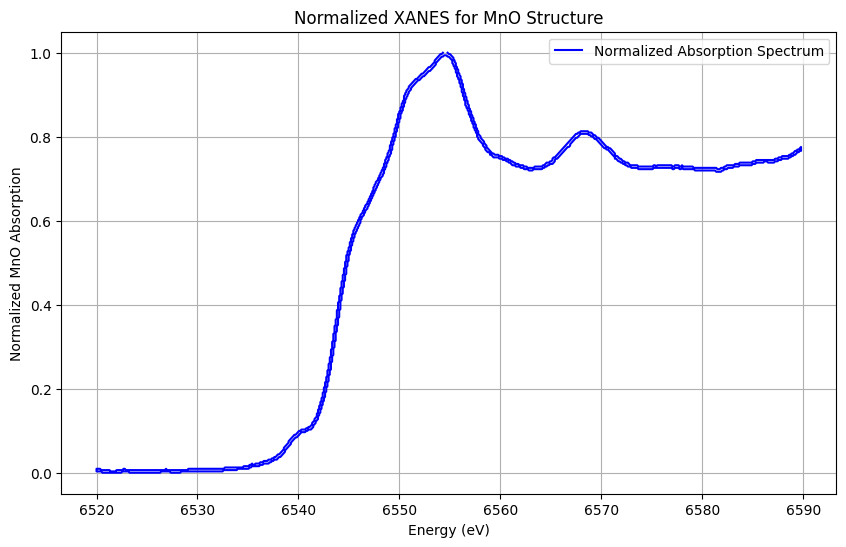

In [22]:
# Split the data into energy and absorption

absorption = line5["y"]  # Absorption column of the data

# Normalize the absorption data
min_absorption = np.min(absorption)
max_absorption = np.max(absorption)
norm_absorption = absorption /(max_absorption - min_absorption)

# Create the plot
line5["y"] = norm_absorption

plt.figure(figsize=(10, 6))
# plt.gca().invert_yaxis()  # Invert y-axis if needed
plt.plot(line5["x"], line5["y"], label='Normalized Absorption Spectrum', color='blue')
plt.xlabel('Energy (eV)')  # Adjust as needed
plt.ylabel('Normalized MnO Absorption')
plt.title('Normalized XANES for MnO Structure')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
# Load the data
MnO_bulk = np.loadtxt('CORE_DIELECTRIC_IMAG.dat')
MnO_bulk = pd.DataFrame(MnO_bulk, columns=['Energy (eV)', 'Absorption'])

In [24]:
# Shiftting the data
# Locate the index of the maximum Y value
max_y = line5['y'].idxmax()
max_MnO = MnO_bulk['Absorption'].idxmax()
# Find the corresponding X value
x_max_y = line5.loc[max_y, 'x']
x_max_MnO = MnO_bulk.loc[max_MnO, 'Energy (eV)']
print(x_max_y)
print(x_max_MnO)

6554.3
6442.361712081991


C:\Users\Lungelo\AppData\Local\Temp\ipykernel_27052\1475285932.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


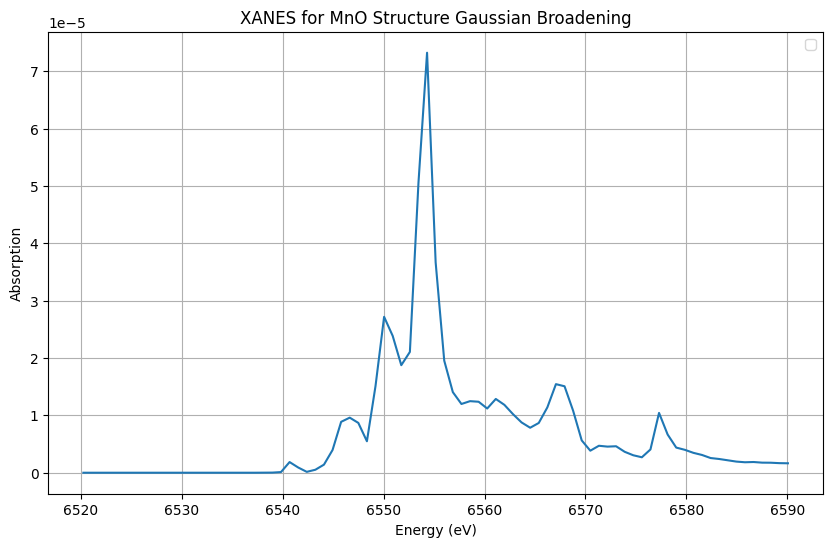

111.93828791800934


In [25]:
# Filter the DataFrame to only include rows where Energy >= 6520
MnO_bulk = MnO_bulk[(MnO_bulk["Energy (eV)"] >= 6408) & (MnO_bulk["Energy (eV)"] <= 6478.5)]
shift_absorption = x_max_y - x_max_MnO
MnO_bulk["Energy (eV)"] = MnO_bulk["Energy (eV)"] + shift_absorption
plt.figure(figsize=(10, 6))
plt.plot(MnO_bulk["Energy (eV)"],MnO_bulk['Absorption'])
plt.xlabel('Energy (eV)')
plt.ylabel('Absorption')
plt.title('XANES for MnO Structure Gaussian Broadening')
plt.grid(True)
plt.legend()
plt.show()
# shift_absorption
print(shift_absorption)

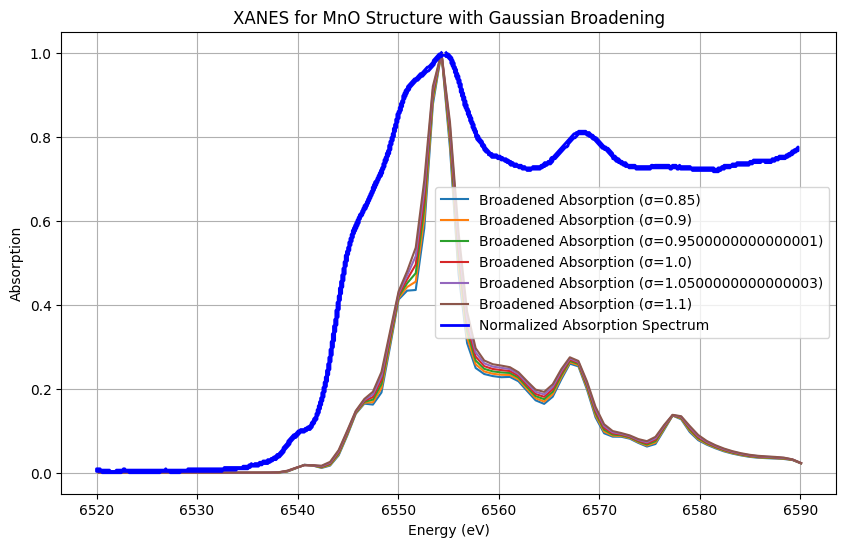

In [26]:

# Assuming you already have the data loaded in MnO_bulk and line5
energy = MnO_bulk["Energy (eV)"].values  # Energy values as numpy array
absorption = MnO_bulk["Absorption"].values  # Absorption values as numpy array

# Define the Gaussian function
def gaussian(x, x0, sigma):
    return np.exp(-(x - x0)**2 / (2 * sigma**2))

# Set the broadening factors to explore
broadening_factors = np.arange(0.85, 1.1, 0.05)  # From 0.5 to 1.1 in steps of 0.2

# Create the plot
plt.figure(figsize=(10, 6))

# Loop over each broadening factor and calculate the broadened absorption
for broadening_factor in broadening_factors:
    # Create an array for the broadened absorption
    broadened_absorption = np.zeros_like(absorption)

    # Loop over each energy point and apply Gaussian broadening
    for i in range(len(energy)):
        broadened_absorption += absorption[i] * gaussian(energy, energy[i], broadening_factor)

    # Normalize the result
    broadened_absorption /= np.max(broadened_absorption)

    # Plot the broadened absorption spectrum
    plt.plot(energy, broadened_absorption, label=f'Broadened Absorption (σ={broadening_factor})')

# Plot the normalized absorption spectrum from line5
plt.plot(line5["x"], line5["y"], label='Normalized Absorption Spectrum', color='blue', linewidth=2)

# Labeling the plot
plt.xlabel('Energy (eV)')
plt.ylabel('Absorption')
plt.title('XANES for MnO Structure with Gaussian Broadening')
plt.grid(True)
plt.legend()
plt.show()
